In [1]:
import pandas as pd
import re

In [2]:
combined_dataset = pd.read_csv('C:/Users/PC/Desktop/CapstoneProject/combined_dataset.csv')

In [3]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   German   201795 non-null  object
 1   English  201936 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [4]:
# Observing the shape of merged dataframes

combined_dataset.shape

(201936, 2)

In [5]:
# Observing the top 5 entries of merged dataframe

combined_dataset.head()

,German,English
0,Steigt Gold auf 10.000 Dollar?\n,"$10,000 Gold?\n"
1,"SAN FRANCISCO – Es war noch nie leicht, ein ra...",SAN FRANCISCO – It has never been easy to have...
2,In letzter Zeit allerdings ist dies schwierige...,"Lately, with gold prices up more than 300% ove..."
3,Erst letzten Dezember verfassten meine Kollege...,"Just last December, fellow economists Martin F..."
4,"Und es kam, wie es kommen musste.\n",Wouldn’t you know it?\n


In [6]:
# Dropping the null values from the dataframe

combined_dataset.dropna()

,German,English
0,Steigt Gold auf 10.000 Dollar?\n,"$10,000 Gold?\n"
1,"SAN FRANCISCO – Es war noch nie leicht, ein ra...",SAN FRANCISCO – It has never been easy to have...
2,In letzter Zeit allerdings ist dies schwierige...,"Lately, with gold prices up more than 300% ove..."
3,Erst letzten Dezember verfassten meine Kollege...,"Just last December, fellow economists Martin F..."
4,"Und es kam, wie es kommen musste.\n",Wouldn’t you know it?\n
...,...,...
201790,Das bleibt eine der größten Errungenschaften i...,It didn’t have to be this way.\n
201791,Gleichzeitig scheint sich Zumas revolutionäre ...,This past year has seen one missed opportunity...
201792,"In einer Region, wo die älteren Menschen sehr ...",South African president Thabo Mbeki convened n...
201793,Drei von zehn Südafrikanern sind jünger als 15...,Some African leaders – notably Ghana’s preside...


In [7]:
# Dropping the duplicates from the dataframe

combined_dataset = combined_dataset.drop_duplicates()

In [8]:
# Observing shape of the dataframe after dropping null values and duplicates

combined_dataset.shape

(201936, 2)

In [9]:
# Randomly sample 5% of dataframe

combined_dataset_sample = combined_dataset.sample(frac = 0.01)

In [10]:
# Observing the shape of sampled dataframe

combined_dataset_sample.shape

(2019, 2)

In [11]:
# Adding columns in the dataframe which shows the length of each English and German sentence

combined_dataset_sample['eng_length'] = combined_dataset_sample['English'].str.len()

combined_dataset_sample['ger_length'] = combined_dataset_sample['German'].str.len()

In [12]:
# Observing the information of sampled dataframe

combined_dataset_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 136156 to 78086
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   German      2018 non-null   object 
 1   English     2019 non-null   object 
 2   eng_length  2019 non-null   int64  
 3   ger_length  2018 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 78.9+ KB


In [13]:
# Observing top 5 entries of the sampled dataframe

combined_dataset_sample.head(5)

,German,English,eng_length,ger_length
136156,Seitdem besteht die Haltung der Zentralregieru...,Lost in the debates about whether the European...,351,148.0
17088,Als Schröder vor sieben Jahren an die Macht ka...,Schroeder came to power seven years ago repres...,239,317.0
200521,Hinzu kommen die sehr viel größeren Zahlen von...,It would also reduce the increasing inequality...,80,190.0
84918,Warum ist die US-Politik derart akkommodierend?\n,The means of discussing these questions is kno...,109,48.0
45143,Duisenberg war sich dieses Junktims bewusst un...,No one wants this.\n,19,65.0


In [14]:
def clean_sentence(sentence):
    sentence = sentence.lower()  #Convert to lowercase
    sentence = re.sub(r'\s+', ' ', sentence)  # Remove new line character
    sentence = sentence.strip()  # Remove leading and trailing white spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Replace multiple spaces with a single space
    sentence = re.sub(r'[^\w\s.,!?\'"]', '', sentence)  # Remove special characters except common punctuation
    sentence = 'START_ '+ sentence + ' _END'
    return sentence

In [15]:
# Calling process_data function on the sampled dataframe

combined_dataset_sample['German'] = combined_dataset_sample['German'].astype(str).apply(clean_sentence)

In [16]:
combined_dataset_sample['English'] = combined_dataset_sample['English'].astype(str).apply(clean_sentence)

In [17]:
# Observing top 5 entries of the processed dataframe

combined_dataset_sample.head(5)

,German,English,eng_length,ger_length
136156,START_ seitdem besteht die haltung der zentral...,START_ lost in the debates about whether the e...,351,148.0
17088,START_ als schröder vor sieben jahren an die m...,START_ schroeder came to power seven years ago...,239,317.0
200521,START_ hinzu kommen die sehr viel größeren zah...,START_ it would also reduce the increasing ine...,80,190.0
84918,START_ warum ist die uspolitik derart akkommod...,START_ the means of discussing these questions...,109,48.0
45143,START_ duisenberg war sich dieses junktims bew...,START_ no one wants this. _END,19,65.0


Pre Processing - Dataset suitable to be used for AIML model learning

In [18]:
# Function to generate word tokens
from tensorflow.keras.preprocessing.text import Tokenizer

def tokenize(sentences):
    # Create tokenizer
    text_tokenizer = Tokenizer()

    # Fit texts
    text_tokenizer.fit_on_texts(sentences)
    return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

In [19]:
# Generate word index

eng_tokenized, eng_tokenizer = tokenize(combined_dataset_sample['English'])
ger_tokenized, ger_tokenizer = tokenize(combined_dataset_sample['German'])

eng_word_index = eng_tokenizer.word_index
ger_word_index = ger_tokenizer.word_index

In [20]:
# Finding the vocabulary size with number of unique tokens

english_vocab = len(eng_tokenizer.word_index) + 1
german_vocab = len(ger_tokenizer.word_index) + 1

print("English vocabulary is of {} unique words".format(english_vocab))
print("german vocabulary is of {} unique words".format(german_vocab))

English vocabulary is of 8067 unique words
german vocabulary is of 10523 unique words


In [21]:
# Define the parameters

maxlen_eng = int(len(max(eng_tokenized, key=len)))
maxlen_ger = int(len(max(ger_tokenized, key=len)))

print("Maximum Length of English tokens is {}".format(maxlen_eng))
print("Maximum Length of German tokens is {}".format(maxlen_ger))

Maximum Length of English tokens is 87
Maximum Length of German tokens is 87


In [22]:
# Generate token sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
eng_pad_sentence = pad_sequences(eng_tokenized, maxlen_eng, padding = "post")
ger_pad_sentence = pad_sequences(ger_tokenized, maxlen_ger, padding = "post")

print('Number of English Samples are {}:', len(eng_pad_sentence))
print('Number of German Samples are {}:', len(ger_pad_sentence))

Number of English Samples are {}: 2019
Number of German Samples are {}: 2019


Model Design

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(eng_pad_sentence,ger_pad_sentence,test_size=0.25,shuffle=True,random_state=101)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1514, 87)
(505, 87)
(1514, 87)
(505, 87)


In [24]:
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Activation, RepeatVector, Dropout, BatchNormalization, Flatten, Bidirectional, TimeDistributed, SimpleRNN
from tensorflow.keras.models import Model, Sequential

In [25]:
# Designing the basic LSTM model

model_translate_lstm = Sequential()

model_translate_lstm.add(Embedding(input_dim = english_vocab, output_dim = 128,input_shape=(maxlen_eng,), trainable = False))

model_translate_lstm.add(LSTM(64, return_sequences=False))

model_translate_lstm.add(RepeatVector(maxlen_ger))

model_translate_lstm.add(LSTM(64, return_sequences=True, dropout=0.2))

model_translate_lstm.add(TimeDistributed(Dense(1000)))

model_translate_lstm.add(Dense(german_vocab,activation = 'softmax'))

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
rms = RMSprop(learning_rate=0.001)
model_translate_lstm.compile(loss=sparse_categorical_crossentropy, optimizer=rms, metrics=['accuracy'])

In [27]:
model_translate_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 87, 128)             │       1,032,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 87, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 87, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 87, 1000)            │          65,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 87, 10523)           │      10,533,523 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,713,531 (44.68 MB)

 Trainable params: 10,680,955 (40.74 MB)

 Non-trainable params: 1,032,576 (3.94 MB)

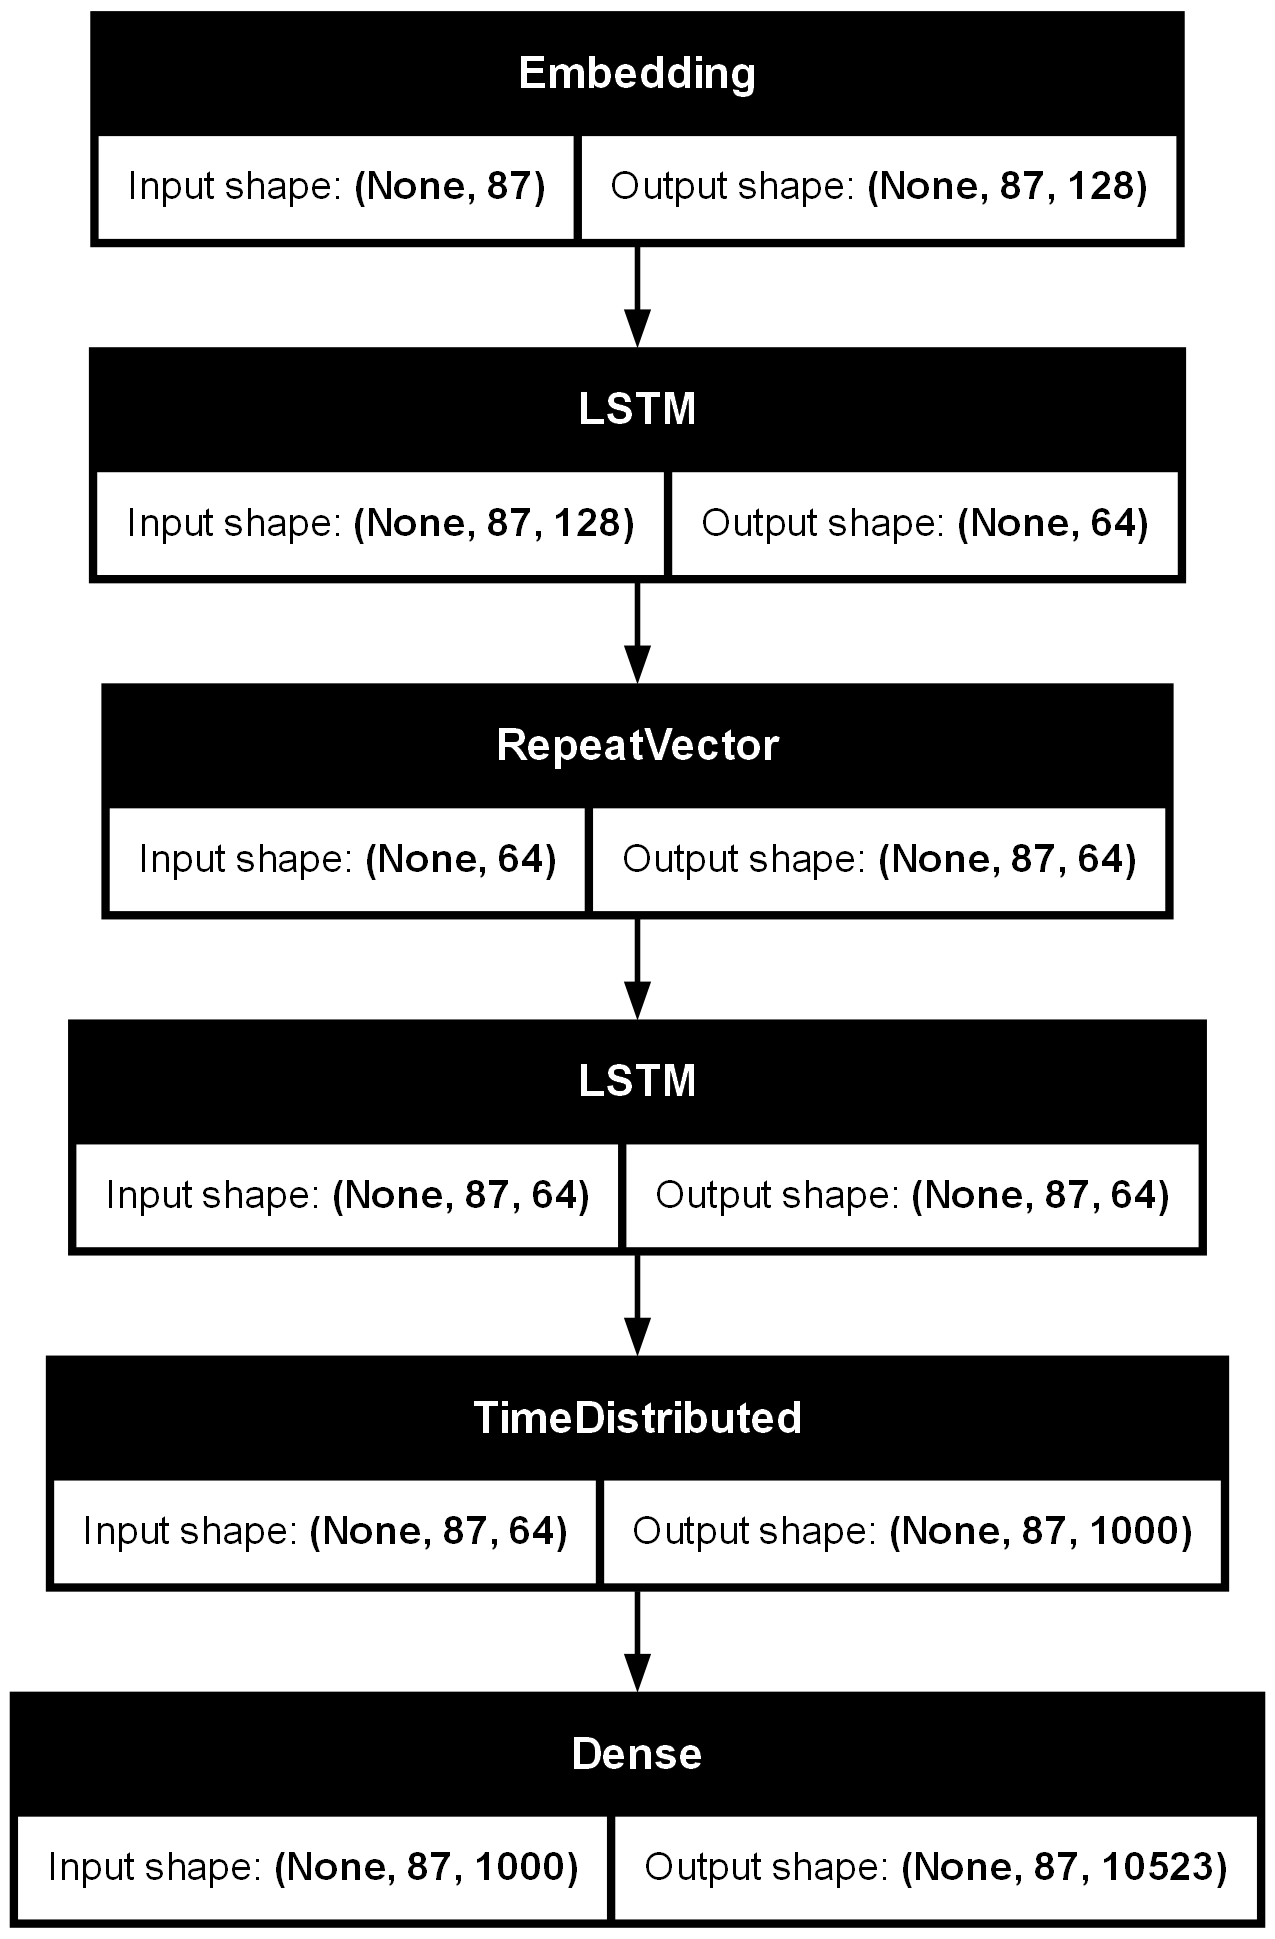

In [28]:
from keras.utils import plot_model
plot_model(model_translate_lstm, to_file='model.png', show_shapes=True)

In [29]:

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
checkpoint_filepath = 'checkpoint.model.keras'
es = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=40)
rl = ReduceLROnPlateau(monitor='val_accuracy',mode='max',verbose=1,patience=5,factor=0.1,min_lr=0.001)
mc = ModelCheckpoint(checkpoint_filepath,monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

In [30]:
history = model_translate_lstm.fit(X_train, Y_train, epochs = 10, batch_size = 512, validation_split = 0.3, callbacks = [es,rl,mc])

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.2463 - loss: 9.2407      
Epoch 1: val_accuracy improved from -inf to 0.72421, saving model to checkpoint.model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 0.2786 - loss: 9.2376 - val_accuracy: 0.7242 - val_loss: 8.6668 - learning_rate: 0.0010
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7257 - loss: 8.1733
Epoch 2: val_accuracy did not improve from 0.72421
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7260 - loss: 8.0973 - val_accuracy: 0.7242 - val_loss: 2.8733 - learning_rate: 0.0010
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7295 - loss: 2.7931
Epoch 3: val_accuracy did not improve from 0.72421
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.7289 - loss: 2.7949 - val_accuracy: 0.7242 - val_loss: 2.6621 - learning_rate: 0.0010
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7272 - loss: 2.6195
Epoch 4: val_accuracy did not improve from 0.72421
3/3 ━━━━━━━━━━

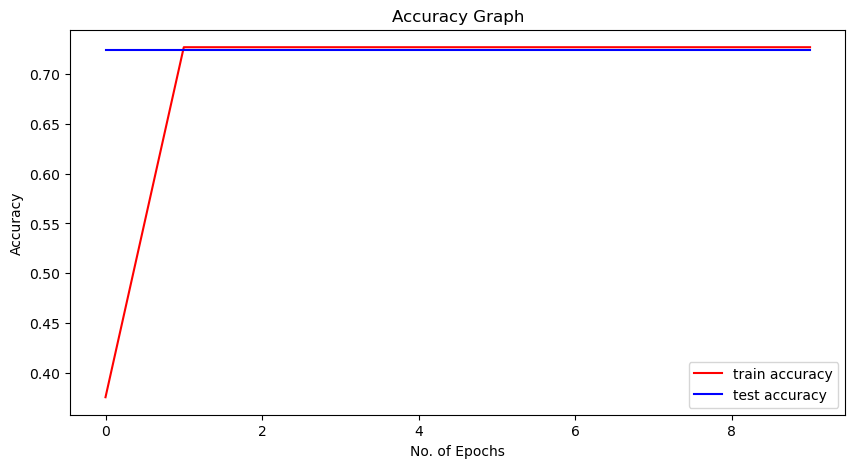

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],'r',label='train accuracy')
plt.plot(history.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [32]:
# Evaluating the model performance on test data

results_translate = model_translate_lstm.evaluate(X_test, Y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.7231 - loss: 2.6407


In [33]:
# Evaluating the model performance on train data

results_translate_train = model_translate_lstm.evaluate(X_train, Y_train)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 175ms/step - accuracy: 0.7315 - loss: 2.5301


In [34]:
# Function to generate words from the index

def logits_to_sentence(logits, tokenizer):

    index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
    index_to_words[0] = '<empty>' 

    return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [37]:
# Making predictions using model on randomly selected X_test sample 
import numpy as np
index = 10

# Printing original sentences from both the languages

print("The english sentence is: {}".format(combined_dataset_sample.iloc[index]['English']))
print("The german sentence is: {}".format(combined_dataset_sample.iloc[index]['German']))

# Printing predicted sentence

print('The predicted sentence is :')

print(logits_to_sentence(model_translate_lstm.predict(X_test[index:index+1])[0], ger_tokenizer))

The english sentence is: START_ instead, he could be headed to the presidency. _END
The german sentence is: START_ heute braucht die freiheit dieselbe art unnachgiebiger verteidigung. _END
The predicted sentence is :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
<empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty> <empty>
